In [1]:
import gzip
import json
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

In [2]:
with gzip.open('xbar/1/xbar.json.gz','rb') as f:
    design = json.loads(f.read().decode('utf-8'))

In [3]:
instances = pd.DataFrame(design['instances'])
nets = pd.DataFrame(design['nets'])

In [4]:
instances

,name,id,xloc,yloc,cell,orient
0,clk_gate_out_reg/latch,0,41984,44544,23,0
1,clk_gate_out_reg_0/latch,1,41984,47616,23,6
2,clk_gate_out_reg_1/latch,2,44160,44544,23,0
3,clk_gate_out_reg_2/latch,3,44160,47616,23,0
4,clk_gate_out_reg_3/latch,4,46336,47616,23,0
...,...,...,...,...,...,...
3947,U4123,3947,21888,53760,42,4
3948,U4125,3948,33664,66048,42,0
3949,U4128,3949,23296,66048,34,0
3950,ZCTSBUF_205_132,3950,40576,44544,11,0


In [5]:
nets

,name,id
0,clk,0
1,reset,1
2,in[383],2
3,in[382],3
4,in[381],4
...,...,...
4477,n6899,4477
4478,n6900,4478
4479,n6903,4479
4480,n6915,4480


In [6]:
with gzip.open('cells.json.gz','rb') as f:
    cells = json.loads(f.read().decode('utf-8'))
cells

[{'name': 'AND2_X1',
  'width': 768,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'Z', 'id': 3, 'dir': 1}],
  'id': 0},
 {'name': 'AND2_X2',
  'width': 896,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'Z', 'id': 3, 'dir': 1}],
  'id': 1},
 {'name': 'AND3_X1',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 2},
 {'name': 'AND3_X2',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 3},
 {'name': 'AND4_X1',
  'width': 1152,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id

In [7]:
len(cells)

80

In [8]:
conn=np.load('xbar/1/xbar_connectivity.npz')
A = coo_matrix((conn['data'], (conn['row'], conn['col'])), shape=conn['shape'])
A

<3952x4482 sparse matrix of type '<class 'numpy.int64'>'
	with 17444 stored elements in COOrdinate format>

In [9]:
x = 0
for i in range(100):
    for j in range(100):
        if ((A.getrow(i).getcol(j).toarray()[0][0]) > 0):
            x += 1
print(x)

0


In [10]:
A = A.__mul__(A.T)
A

<3952x3952 sparse matrix of type '<class 'numpy.int64'>'
	with 141472 stored elements in Compressed Sparse Row format>

In [11]:
x = 0
for i in range(100):
    for j in range(100):
        if ((A.getrow(i).getcol(j).toarray()[0][0]) > 0):
            x += 1
print(x)

2812


In [12]:
def buildBST(array,start=0,finish=-1):
    if finish<0:
        finish = len(array)
    mid = (start + finish) // 2
    if mid-start==1:
        ltl=start
    else:
        ltl=buildBST(array,start,mid)
    
    if finish-mid==1:
        gtl=mid
    else:
        gtl=buildBST(array,mid,finish)
        
    return((array[mid],ltl,gtl))

In [13]:
congestion_data = np.load('xbar/1/xbar_congestion.npz')
xbst=buildBST(congestion_data['xBoundaryList'])
ybst=buildBST(congestion_data['yBoundaryList'])
demand = np.zeros(shape = [instances.shape[0],])

In [14]:
congestion_data['demand']

array([[[ 0,  0,  0, ...,  0,  0,  1],
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 2,  0,  0, ...,  0,  0,  1],
        ...,
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 0,  0,  0, ...,  0,  0,  1]],

       [[ 2,  2,  5, ...,  3,  2,  2],
        [ 3,  2,  4, ...,  2,  1,  0],
        [ 2,  3,  6, ...,  2,  2,  0],
        ...,
        [ 3,  3,  9, ...,  4,  3,  1],
        [ 2,  5,  7, ...,  3,  3,  1],
        [ 0,  1,  2, ...,  1,  1,  1]],

       [[ 2,  0,  3, ...,  1,  0,  1],
        [ 3,  0,  7, ...,  2,  2,  1],
        [ 5,  2,  8, ...,  3, 14, 16],
        ...,
        [ 4,  3,  6, ...,  3,  1,  2],
        [ 1,  3,  5, ...,  1,  2,  1],
        [ 0,  1,  1, ...,  0,  1,  0]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0

In [15]:
def getGRCIndex(x,y,xbst,ybst):
    while (type(xbst)==tuple):
        if x < xbst[0]:
            xbst=xbst[1]
        else:
            xbst=xbst[2]
            
    while (type(ybst)==tuple):
        if y < ybst[0]:
            ybst=ybst[1]
        else:
            ybst=ybst[2]
            
    return ybst, xbst

In [17]:
for k in range(instances.shape[0]):
    print(k)
    xloc = instances.iloc[k]['xloc']; yloc = instances.iloc[k]['yloc']
    i,j=getGRCIndex(xloc,yloc,xbst,ybst)
    d = 0 
    for l in list(congestion_data['layerList']): 
        lyr=list(congestion_data['layerList']).index(l)
        d += congestion_data['demand'][lyr][i][j]
    demand[k] = d
        
instances['routing_demand'] = demand

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [18]:
for key in conn:
    print(key)

row
col
data
shape


In [19]:
conn['row']

array([3951,  492,  941, ...,    2,    1,    0])

In [20]:
congestion_data['layerList']

array(['M1', 'MINT1', 'MINT2', 'MINT3', 'MINT4', 'MINT5', 'MSMG1',
       'MSMG2', 'MSMG3', 'MSMG4', 'MSMG5', 'MG1', 'MG2'], dtype='<U5')

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
G = nx.from_numpy_array(A)

In [23]:
num_nodes = nx.number_of_nodes(G)
num_edges = nx.number_of_edges(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)
clustering_coefficient = nx.average_clustering(G)
diameter = nx.diameter(G)
avg_path_length = nx.average_shortest_path_length(G)

In [24]:
num_nodes

3952

In [25]:
num_edges

72712

In [26]:
avg_degree

36.797570850202426

In [27]:
density

0.009313482877803703

In [28]:
clustering_coefficient

0.5102145938022059

In [29]:
diameter

6

In [30]:
avg_path_length

3.741580694479028

In [31]:
depths_graph = nx.shortest_path_length(G)#, source='OBT:000000')


In [32]:
depths_graph_max = max(depths_graph)[1]

In [33]:
max(depths_graph_max.values())

6

In [34]:
max(len(c) for c in nx.find_cliques(G))

42

In [35]:
degree_cent = nx.degree_centrality(G)
#eigen_cent = nx.eigenvector_centrality(G)

In [36]:
max(degree_cent.values())

0.01974183750949127

In [37]:
#histplot of degrees
nx.find_cliques(G)

<generator object find_cliques at 0x7fe702191580>

In [38]:
(print(len(c)) for c in nx.find_cliques(G))

<generator object <genexpr> at 0x7fe702191820>

In [39]:
non_edge_clique_count = 0
for c in nx.find_cliques(G):
    if len(c) > 2 :
        non_edge_clique_count += 1
        print (c)
non_edge_clique_count

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 3950, 3951]
[0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 27, 28, 29, 30, 31]
[1, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 60, 61, 62, 63]
[2, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 94, 93, 110, 95]
[3, 131, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
[4, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 176, 175, 174, 159]
[5, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 208, 209, 206, 207]
[6, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

579

In [40]:
greater_than_ten_clique_count = 0
for c in nx.find_cliques(G):
    if len(c) > 10:
        greater_than_ten_clique_count += 1
        print (c)
greater_than_ten_clique_count

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 3950, 3951]
[0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 27, 28, 29, 30, 31]
[1, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 60, 61, 62, 63]
[2, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 94, 93, 110, 95]
[3, 131, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
[4, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 176, 175, 174, 159]
[5, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 208, 209, 206, 207]
[6, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

423

In [41]:
largest_clique = []
for c in nx.find_cliques(G):
    if len(c) == 42:
        print (c)
        largest_clique = c
        
largest_clique

[3949, 3840, 3841, 3842, 3843, 3844, 3845, 3848, 3868, 3869, 3870, 3871, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881, 941, 1200, 3908, 3914, 2273, 2534, 3575, 2791, 3915, 492, 3054, 3315, 3927, 3316, 3924, 3925, 3926, 1497, 1755, 2013, 3838, 3839]


[3949,
 3840,
 3841,
 3842,
 3843,
 3844,
 3845,
 3848,
 3868,
 3869,
 3870,
 3871,
 3874,
 3875,
 3876,
 3877,
 3878,
 3879,
 3880,
 3881,
 941,
 1200,
 3908,
 3914,
 2273,
 2534,
 3575,
 2791,
 3915,
 492,
 3054,
 3315,
 3927,
 3316,
 3924,
 3925,
 3926,
 1497,
 1755,
 2013,
 3838,
 3839]

In [42]:
instances[instances['id'].isin(largest_clique)]

,name,id,xloc,yloc,cell,orient,routing_demand
492,U3709,492,512,75264,48,0,28.0
941,U4210,941,5376,84480,48,6,16.0
1200,U4516,1200,512,78336,48,0,18.0
1497,U4854,1497,3200,72192,48,0,22.0
1755,U5159,1755,4352,84480,48,0,15.0
2013,U5466,2013,4352,78336,48,6,14.0
2273,U5772,2273,3328,87552,48,6,2.0
2534,U6078,2534,14720,81408,48,0,21.0
2791,U6383,2791,4864,84480,48,0,15.0
3054,U6688,3054,6400,84480,48,0,16.0


In [43]:
np.sum(instances['routing_demand'])/len(instances['routing_demand'])

25.646255060728745

In [44]:
nx.density(G)

0.009313482877803703

(array([71.,  0.,  1.,  0.,  3.,  2.,  0.,  0.,  0.,  2.]),
 array([  0.,  78., 156., 234., 312., 390., 468., 546., 624., 702., 780.]),
 <BarContainer object of 10 artists>)

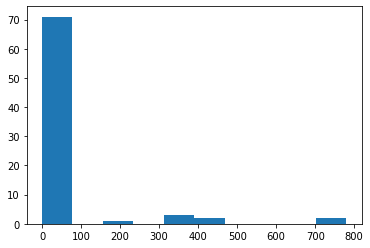

In [45]:
plt.hist(nx.degree_histogram(G))

In [46]:
max(degree_cent, key=degree_cent.get)

3949

In [47]:
degree_cent[3949]

0.01974183750949127

In [48]:
list(nx.all_neighbors(G, 3949))

[492,
 941,
 1200,
 1210,
 1211,
 1213,
 1214,
 1497,
 1755,
 2013,
 2273,
 2534,
 2791,
 2801,
 2802,
 3054,
 3315,
 3316,
 3575,
 3581,
 3836,
 3837,
 3838,
 3839,
 3840,
 3841,
 3842,
 3843,
 3844,
 3845,
 3846,
 3848,
 3865,
 3866,
 3867,
 3868,
 3869,
 3870,
 3871,
 3872,
 3873,
 3874,
 3875,
 3876,
 3877,
 3878,
 3879,
 3880,
 3881,
 3882,
 3883,
 3886,
 3889,
 3890,
 3891,
 3892,
 3893,
 3895,
 3896,
 3897,
 3898,
 3899,
 3900,
 3901,
 3902,
 3908,
 3914,
 3915,
 3924,
 3925,
 3926,
 3927,
 3933,
 3946,
 3947,
 3948,
 3949]

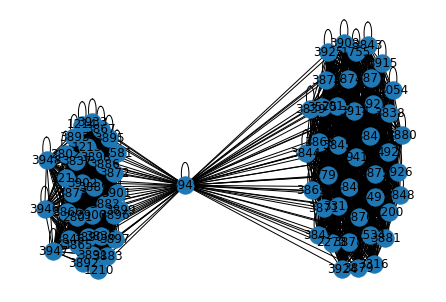

In [49]:
nx.draw(nx.subgraph(G, nx.all_neighbors(G, 3949)), with_labels=True)

In [ ]:
G_adjusted = G.remove_edges_from(G.selfloop_edges())